<a href="https://colab.research.google.com/github/shreyasharma1111/Tiber-Cloud-Workshop/blob/main/Shreya_Loan_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOAN PRICE PREDICTION

In [31]:
!pip install streamlit pandas scikit-learn      # streamlit: For building the web app interface.
                                                # pandas: For data manipulation and analysis.
                                                # scikit-learn: For building the machine learning model.
import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import time
from google.colab import files
uploaded = files.upload()

# Reading the dataset into a DataFrame
loan_dataset = pd.read_csv('loan_approval_dataset.csv')

Saving loan_approval_dataset.csv to loan_approval_dataset (2).csv


In [32]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [33]:
# statistical measures
loan_dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [34]:
loan_dataset.shape

(4269, 13)

In [35]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()
loan_dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

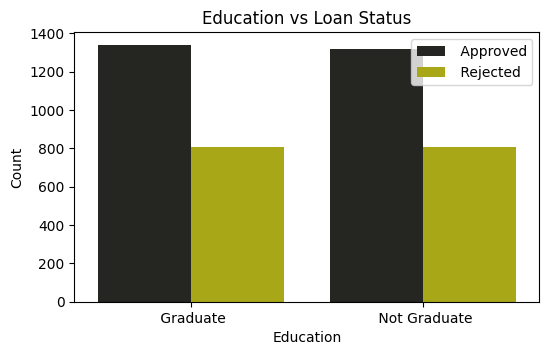

In [36]:
# Education and Loan Status
plt.figure(figsize=(6,3.5))
sns.countplot(x=' education', color='y', hue=' loan_status', data=loan_dataset)
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend()
plt.show()

In [37]:
# Converting Categorical Values to Numerical Values
loan_dataset.replace({' self_employed':{' No':0,' Yes':1},' education':{' Graduate':1,' Not Graduate':0}, ' loan_status':{' Rejected':0, ' Approved':1}},inplace=True)
loan_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [38]:
X = loan_dataset.drop(columns=[' loan_status'],axis=1)
Y = loan_dataset[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(4269, 12) (3415, 12) (854, 12)


In [43]:
# Create Model
model=LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error
training_data_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {training_data_accuracy}")
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Create a Streamlit app
def main():
    st.title("Loan Price Prediction")
    print(st.write("Enter loan details to predict the loan price:"))

    loan_amount = st.number_input("Loan Amount")
    interest_rate = st.number_input("Interest Rate (%)")
    loan_term = st.number_input("Loan Term (years)")

    # Ensure input data is in the correct shape
    input_data = np.array([[loan_amount, interest_rate, loan_term]])

    # Make a prediction and handle exceptions
    if st.button("Predict"):
        try:
            prediction = model.predict(input_data)[0]
            st.write(f"Predicted Loan Price: ${prediction:.2f}")
        except Exception as e:
            st.write(f"Error: {e}")

if __name__ == "__main__":
    main()

2025-02-28 18:02:49.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 18:02:49.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 18:02:49.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 18:02:49.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 18:02:49.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 18:02:49.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 18:02:49.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 18:02:49.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Training Accuracy: 0.7611241217798594
Mean Absolute Error: 0.2388758782201405
None
